In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
from scipy.stats import ttest_ind, pearsonr, gamma, normaltest

sns.set_context("paper", font_scale=2)

# Содержание

Данный ноутбук содержит домашние задания на первые четыре дня интенсива "Погружение в A/B-тестирование".

Для каждого дня и темы вам предоставлен код из соответствующей демонстрации. Для выполнения задания вам нужно произвести соответствующие изменения в существующем коде, чтобы он подходил под условия задания. Некоторые из мест, которые нужно изменить, вы можете найти по комментарию **#TODO**. Остальные места для изменения кода вам нужно найти самостоятельно.

Вопросы в рамках одной темы нужно выполнять последовательно, т.к. результаты последующих заданий зависят от расчетов предыдущих заданий.

## Практическое задание 1 "Бакетирование"

1. Возьмите гамма распределение со следующими параметрами:
- гамма распределение (параметры: k=2, theta = 2);
- размер сэмпла равен 1 000 000;
- метрика: медиана;
- количество бакетов: вариант разбиения - 100.
2. Проведите проверку полученных распределений на нормальность методом, основанным на D’Agostino and Pearson’s тестах (метод normaltest из библиотеки scipy.stats).
3. Выпишите полученные скоры проверок (округлите до десятых) и, основываясь на скоре, укажите можно ли при таком количестве бакетов распределение считать нормальным (при alpha = 0.05).

Initial metric: 3.3533276643103065
Bucketize metric mean: 3.350138012942792
Abs diff: 0.00319



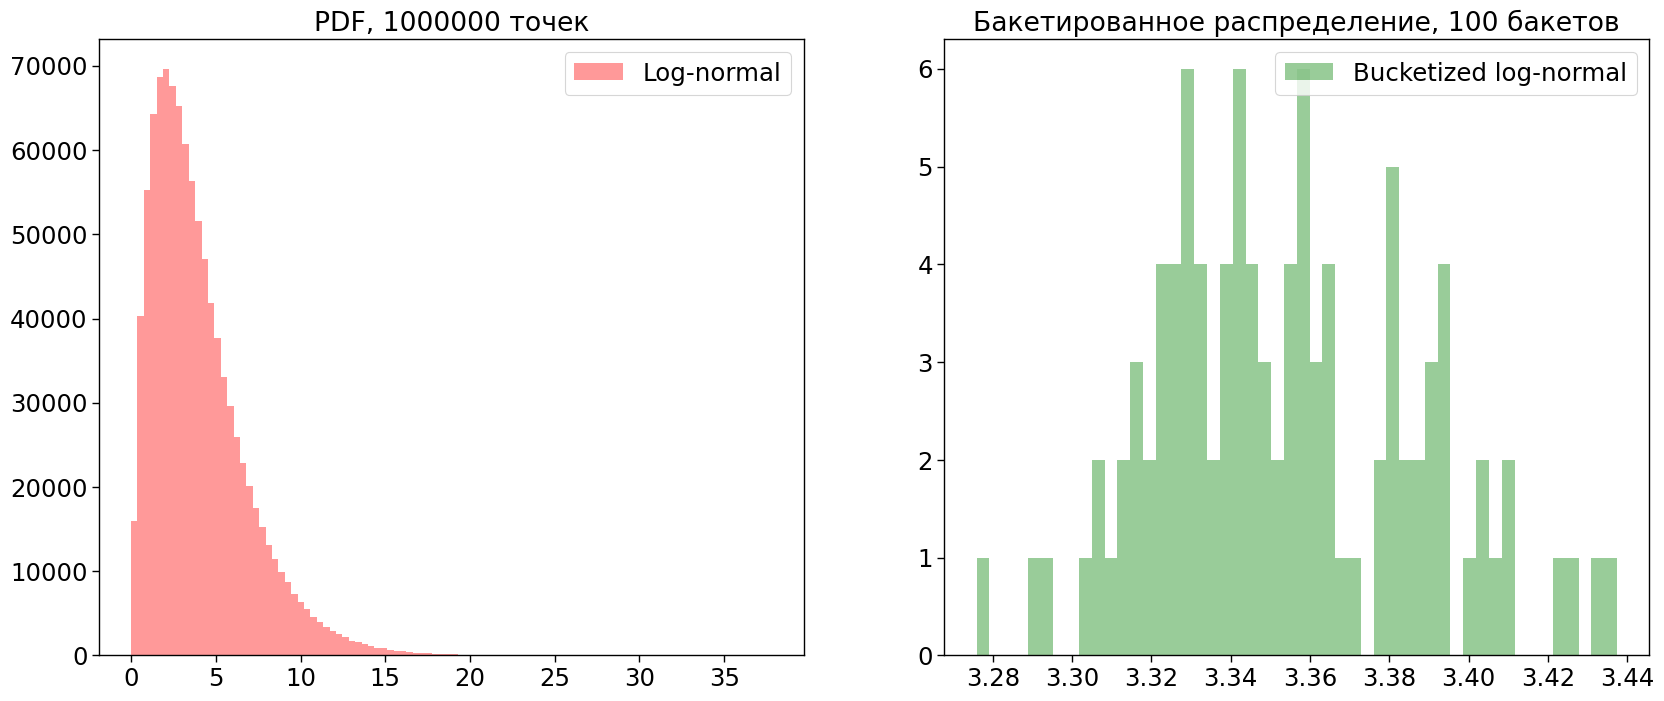

In [19]:
np.random.seed(42)
plt.rcParams.update({'font.size': 14})


size = 1_000_000                                # TODO: поменяйте количество на нужное 
n_buckets = 100                                 # TODO: поменяйте количество бакетов на нужное
metric =  np.median                               # TODO: поменяйте метрику на нужную
a = np.random.gamma(2, 2, size)             # TODO: поменяйте распределение на нужное


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.hist(a, alpha=0.4, bins=100, label='Log-normal', color='Red')
ax1.set_title(f'PDF, {size} точек')

np.random.shuffle(a)


a_buckets = np.array([ metric(x)
                      for x in np.array_split(a, n_buckets) ])
print(f'Initial metric: {metric(a)}')
print(f'Bucketize metric mean: {np.median(a_buckets)}')
print(f'Abs diff: {round(abs(metric(a) - np.median(a_buckets)), 5)}\n')


ax2.hist(a_buckets, alpha=0.4, bins=50, label='Bucketized log-normal', color='Green')
ax2.set_title(f'Бакетированное распределение, {n_buckets} бакетов')

ax1.legend()
ax2.legend()
plt.show()

In [20]:
normaltest(a_buckets)

NormaltestResult(statistic=np.float64(2.419670600252829), pvalue=np.float64(0.2982463965287919))